<a href="https://colab.research.google.com/github/hyeokjun0804/HJ_BigData_Maketing_Course/blob/main/%ED%8C%80%EC%97%B0%EC%8A%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#요양시설 간의 수의 관계에 따른 시설 수 예측

###인공신경망

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2022년_9월_시군구별_장기요양기관_현황.csv")
df

,시도,노인요양시설,공동생활가정,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구
0,서울특별시,5.0,3.0,92.0,71.0,9.0,17.0,NaN,18.0
1,서울특별시,9.0,13.0,111.0,102.0,4.0,19.0,NaN,20.0
2,서울특별시,8.0,23.0,96.0,81.0,6.0,22.0,4.0,9.0
3,서울특별시,20.0,14.0,185.0,144.0,10.0,31.0,NaN,30.0
4,서울특별시,10.0,19.0,120.0,103.0,9.0,26.0,NaN,13.0
...,...,...,...,...,...,...,...,...,...
246,경상남도,9.0,NaN,25.0,19.0,NaN,12.0,NaN,NaN
247,경상남도,6.0,NaN,23.0,13.0,1.0,7.0,NaN,4.0
248,제주특별자치도,19.0,2.0,24.0,19.0,1.0,20.0,NaN,4.0
249,제주특별자치도,42.0,8.0,84.0,64.0,8.0,48.0,NaN,24.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    float64
 2   공동생활가정  221 non-null    float64
 3   방문요양    250 non-null    float64
 4   방문목욕    248 non-null    float64
 5   방문간호    200 non-null    float64
 6   주야간보호   248 non-null    float64
 7   단기보호    78 non-null     float64
 8   복지용구    239 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.8+ KB


In [35]:
df.isnull().sum() #결측값 확인

시도          1
노인요양시설      1
공동생활가정     30
방문요양        1
방문목욕        3
방문간호       51
주야간보호       3
단기보호      173
복지용구       12
dtype: int64

In [36]:
df.fillna(0, inplace = True) #결측값을 0으로 채우기

In [37]:
df.isnull().sum()#결측값 확인

시도        0
노인요양시설    0
공동생활가정    0
방문요양      0
방문목욕      0
방문간호      0
주야간보호     0
단기보호      0
복지용구      0
dtype: int64

In [38]:
df.describe() #통계량 요약

,노인요양시설,공동생활가정,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,17.179283,7.143426,66.350598,46.498008,3.250996,19.972112,0.533865,7.860558
std,18.422479,8.694098,47.418357,36.394217,3.171868,15.046435,1.204097,6.745701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,29.000000,19.000000,1.000000,8.500000,0.000000,2.000000
50%,11.000000,4.000000,55.000000,35.000000,2.000000,17.000000,0.000000,6.000000
75%,21.000000,9.000000,92.000000,66.500000,5.000000,27.500000,1.000000,12.000000
max,129.000000,55.000000,236.000000,199.000000,16.000000,88.000000,10.000000,38.000000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [40]:
import numpy as np

#분류예측

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = df['노인요양시설']

#2.데이터 분할 (train = test split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [41]:
#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state=0, alpha=1, max_iter=1000, hidden_layer_sizes=[50, 50])
                            
#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value: \n", Y_pred)
print("trian accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:3f}".format(rmse)) 

Y predict value: 
 [19.65647948  1.8976759   4.29147251 20.42608721  8.75201472  6.38757508
 27.6604358   9.36276258  2.36865633 40.1425736  14.83856875 18.09426543
 14.31576996 17.11560669 63.91770678 10.69382091  4.34669377 23.21664175
 19.97063157 12.18302061 10.70602133 68.13253387 11.18779726 13.95033793
  5.48512069 10.49356299 34.05369932 27.44247346 11.15922919 12.15075823
  5.96590973 35.93013447 43.67449488  9.12723212 38.16117855  3.55182075
 19.40945519 12.09429455  5.9153335   0.94134144  3.39242255  4.35224107
 21.08551826  6.91462247 11.64876591 22.2202057   3.58890821 27.04530532
 19.01017347  7.14432425 13.30559925 32.17851432 11.66285306 14.06410532
  8.37309435 38.39707597 11.66380285 24.85442936  7.18985548 12.95824965
  6.64471501 14.11221475 11.14895665  6.41446048  9.23551004 10.90537744
  5.70414366  8.15603999 33.24998586 10.70204304 16.6566592  12.60445771
  5.21796079 18.87767571  1.9601897  25.83673797]
trian accuracy : 0.860
RMSE : 14.588134


###딥러닝

In [42]:
import warnings
warnings.filterwarnings("ignore") #딥러닝을 제거하겠다.

In [43]:
#분류예측

#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. 데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [44]:
Y.describe() #통계량 요약

count    251.000000
mean       2.529817
std        0.854647
min        0.000000
25%        1.945910
50%        2.484907
75%        3.091042
max        4.867534
Name: 노인요양시설, dtype: float64

In [98]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5. 시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=5, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

#7. 모형 학습
model.compile(loss="mse",optimizer="adagrad", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs = 100, batch_size = 64, verbose = 2)

Epoch 1/100
3/3 - 1s - loss: 5.0566 - accuracy: 0.0071 - val_loss: 5.1141 - val_accuracy: 0.0000e+00 - 540ms/epoch - 180ms/step
Epoch 2/100
3/3 - 0s - loss: 5.0406 - accuracy: 0.0071 - val_loss: 5.1025 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 3/100
3/3 - 0s - loss: 5.0296 - accuracy: 0.0071 - val_loss: 5.0922 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 4/100
3/3 - 0s - loss: 5.0196 - accuracy: 0.0071 - val_loss: 5.0828 - val_accuracy: 0.0000e+00 - 26ms/epoch - 9ms/step
Epoch 5/100
3/3 - 0s - loss: 5.0105 - accuracy: 0.0071 - val_loss: 5.0746 - val_accuracy: 0.0000e+00 - 26ms/epoch - 9ms/step
Epoch 6/100
3/3 - 0s - loss: 5.0025 - accuracy: 0.0071 - val_loss: 5.0670 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 7/100
3/3 - 0s - loss: 4.9952 - accuracy: 0.0071 - val_loss: 5.0598 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 8/100
3/3 - 0s - loss: 4.9882 - accuracy: 0.0071 - val_loss: 5.0531 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/st

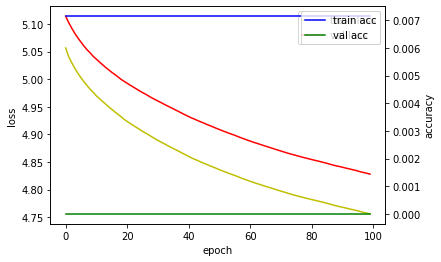

In [99]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label="val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "upper right")

#accuracy(정확도)  그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")


plt.show()

In [100]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 확률: \n", Y_pred[:5])
print("Y 예측 클래스: \n", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 확률: 
 [[0.50093603]
 [0.4938265 ]
 [0.5082813 ]
 [0.43359905]
 [0.49510852]]
Y 예측 클래스: 
 [[1.]
 [0.]
 [1.]
 [0.]
 [0.]]
train accuracy : 4.770
test accuracy : 5.348
